# 数据处理

In [1]:
import pandas as pd
df1 = pd.read_csv('data1.csv',names=['square','bedrooms','price'])
df1.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [2]:
#2D散点图
import seaborn as sns

C:\Users\MZY\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


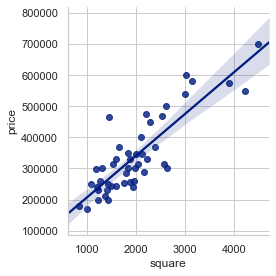

In [3]:
sns.set(context='notebook',style='whitegrid',palette='dark')
df0=pd.read_csv('data0.csv',names=['square','price'])
#           横坐标  纵坐标  数据来源  大小  是否需要拟合
sns.lmplot('square','price',df0,height=4,fit_reg=True)

In [4]:
#3D散点图
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [5]:
df1=pd.read_csv('data1.csv',names=['square','bedrooms','price'])
df1.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

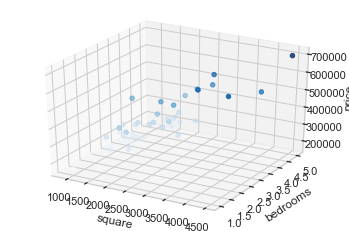

In [7]:
ax = plt.axes(projection='3d')
#设置坐标
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
#             填充数据                                  颜色相关参数   突出参数颜色        
ax.scatter3D(df1['square'],df1['bedrooms'],df1['price'],c=df1['price'],cmap='Blues')

In [8]:
#数据归一化
def normalize_feature(df):
    #                对每一列做数据处理 ：减去平均值再除以标准差
    return df.apply(lambda column:(column-column.mean())/column.std())
df=normalize_feature(df1)

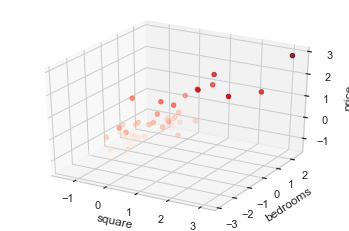

In [9]:
ax=plt.axes(projection='3d')
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.scatter3D(df['square'],df['bedrooms'],df['price'],c=df['price'],cmap='Reds')

In [10]:
import numpy as np

In [11]:
ones = pd.DataFrame({'ones':np.ones(len(df))})#ones是n行一列的数据框，表示x0恒为1
df = pd.concat([ones,df],axis=1)#根据列合并数据

In [12]:
#取出0,1,2三个表头转化为多维数组 左闭右开区间
x_data = np.array(df[df.columns[0:3]])
#取倒数第一个表头
y_data = np.array(df[df.columns[-1]]).reshape(len(df),1)

print(x_data.shape,type(x_data))
print(y_data.shape,type(y_data))

(47, 3) <class 'numpy.ndarray'>
(47, 1) <class 'numpy.ndarray'>


# 创建线性回归模型

In [13]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
tf.reset_default_graph()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
alpha = 0.01#学习率 alpha
epoch = 500 #训练全量数据集的轮数

In [ ]:
#创建线性回归模型（数据流图）
#输入X形状（47,3） 用float是因为数据已经归一化
X = tf.placeholder(tf.float32,x_data.shape)
#输出y形状（47,1）
y = tf.placeholder(tf.float32,y_data.shape)

#权重变量W，形状（3,1）3为X第一维的形状 get_variable可以快速从ckpt中读取“weights”，以便于retrain
W = tf.get_variable("weights",(x_data.shape[1],1),initializer=tf.constant_initializer())

In [ ]:
#假设函数h(x)=w0*x0+w1*x1+w2*x2,其中x0恒为1
#推理值y_pred 形状（47,1） tf.matmul()为矩阵乘法
y_pred = tf.matmul(X,W)

#损失函数采用最小二乘法，y_pred - y是形如（47,1）的向量
#tf.matmul(a,b,transpose_a=True)表示：矩阵a的转置乘矩阵b，即[1,47]*[47,1]
#损失函数操作 loss   
#tf.matmul((y_pred - y),(y_pred - y),transpose_a=True)为损失值累加
loss_op = 1/(2*len(x_data))*tf.matmul((y_pred - y),(y_pred - y),transpose_a=True)
#随机梯度下降优化器opt
opt = tf.train.GradientDescentOptimizer(learning_rate=alpha)
# 单步训练操作train_op
train_op = opt.minimize(loss_op)

In [ ]:
#创建会话（运行环境）
with tf.Session() as sess:
    #初始化全局变量
    sess.run(tf.global_variables_initializer())
    #开始模型训练
    #因为训练集较小，所以采用梯度下降优化算法，每次都使用全量数据训练
    for e in range(1,epoch + 1):
        sess.run(train_op,feed_dict={X:x_data,y:y_data})
        if e % 10 == 0:
            loss,w = sess.run([loss_op,W],feed_dict={X:x_data,y:y_data})
            log_str = "Epoch %d \t Loss=%.4g \t Model: y = %.4gx1 + %.4gx2 + %.4g"
            #print(log_str%(e,loss,w[1],w[2],w[0]))